# Heart Disease Prediction.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('white')

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
n_rows, n_cols = df.shape
n_rows, n_cols

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.duplicated().sum()

0

<Axes: >

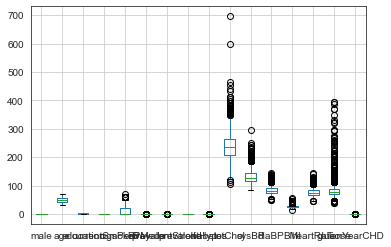

In [8]:
df.boxplot(figsize=(20, 10))

<Axes: xlabel='male'>

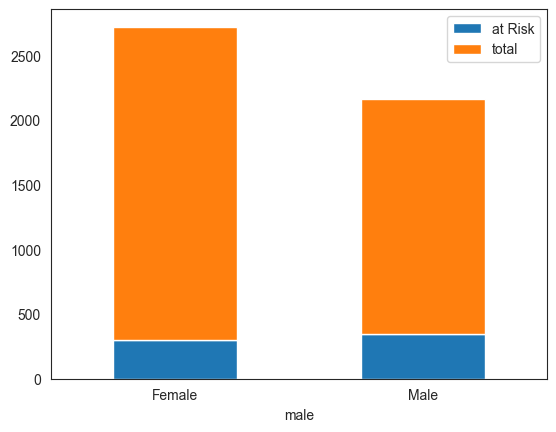

In [9]:
df_ = pd.DataFrame({
    'at Risk': df.groupby('male')['TenYearCHD'].sum(),
    'total':  df.groupby('male')['TenYearCHD'].count() 
}).rename(index={0: 'Female', 1: 'Male'})
df_.plot(kind='bar', stacked=True, rot=0)

In [10]:
df_.rename_axis('Gender', axis=0)

,at Risk,total
Gender,,
Female,301,2419
Male,343,1819


<Axes: xlabel='sex'>

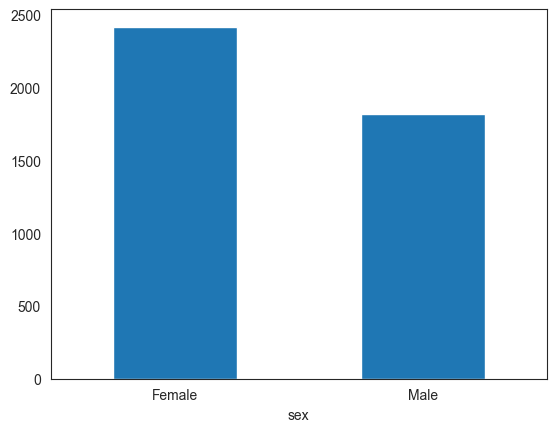

In [11]:
df['male'].map({
    0: 'Female', 
    1: 'Male'
}).value_counts().plot(
    kind='bar', rot=0, xlabel='sex')

<Axes: ylabel='Density'>

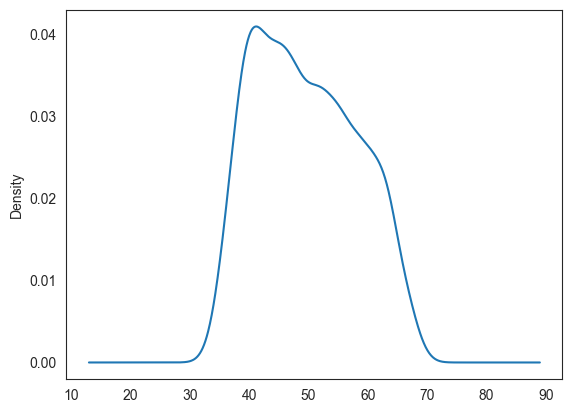

In [12]:
df['age'].plot(kind='kde')

<Axes: xlabel='education'>

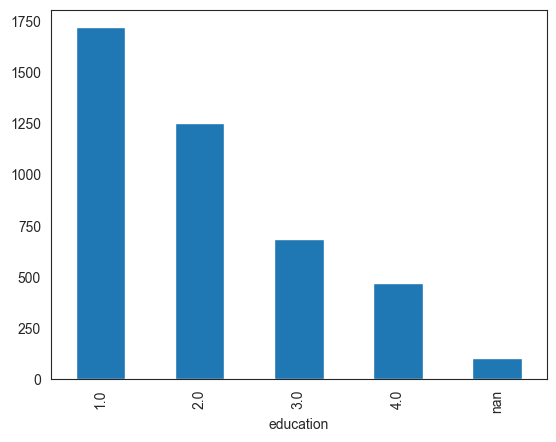

In [13]:
df['education'].value_counts(dropna=False).plot(kind='bar')

<Axes: xlabel='currentSmoker'>

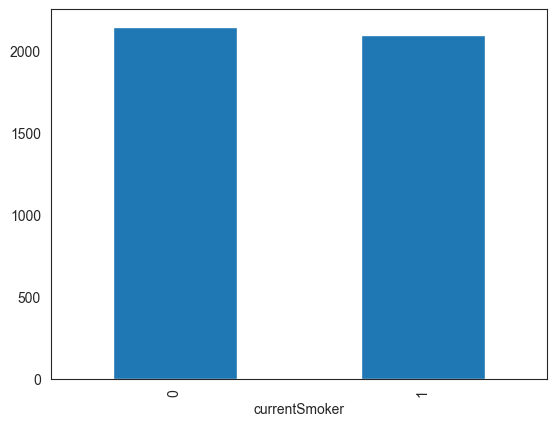

In [14]:
df['currentSmoker'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

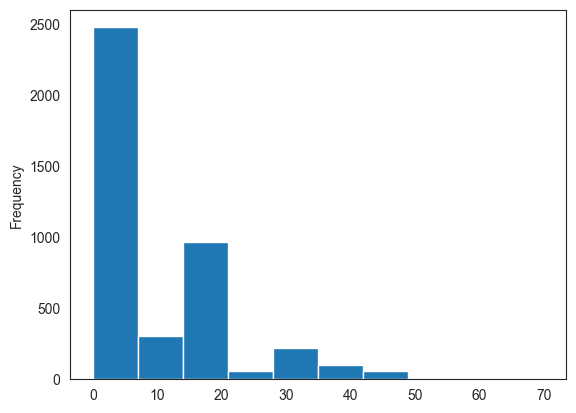

In [15]:
df.cigsPerDay.plot(kind='hist')

<Axes: xlabel='BPMeds'>

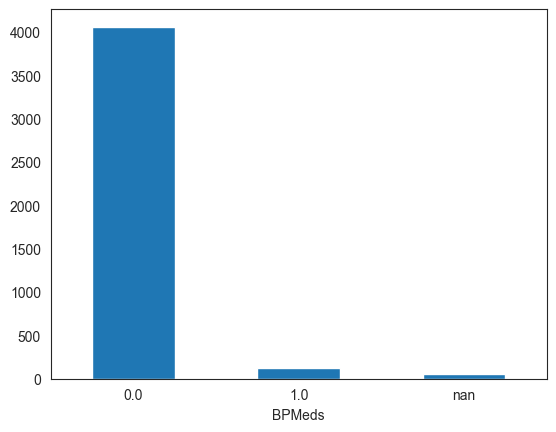

In [16]:
df['BPMeds'].value_counts(dropna=False).plot(kind='bar', rot=0)

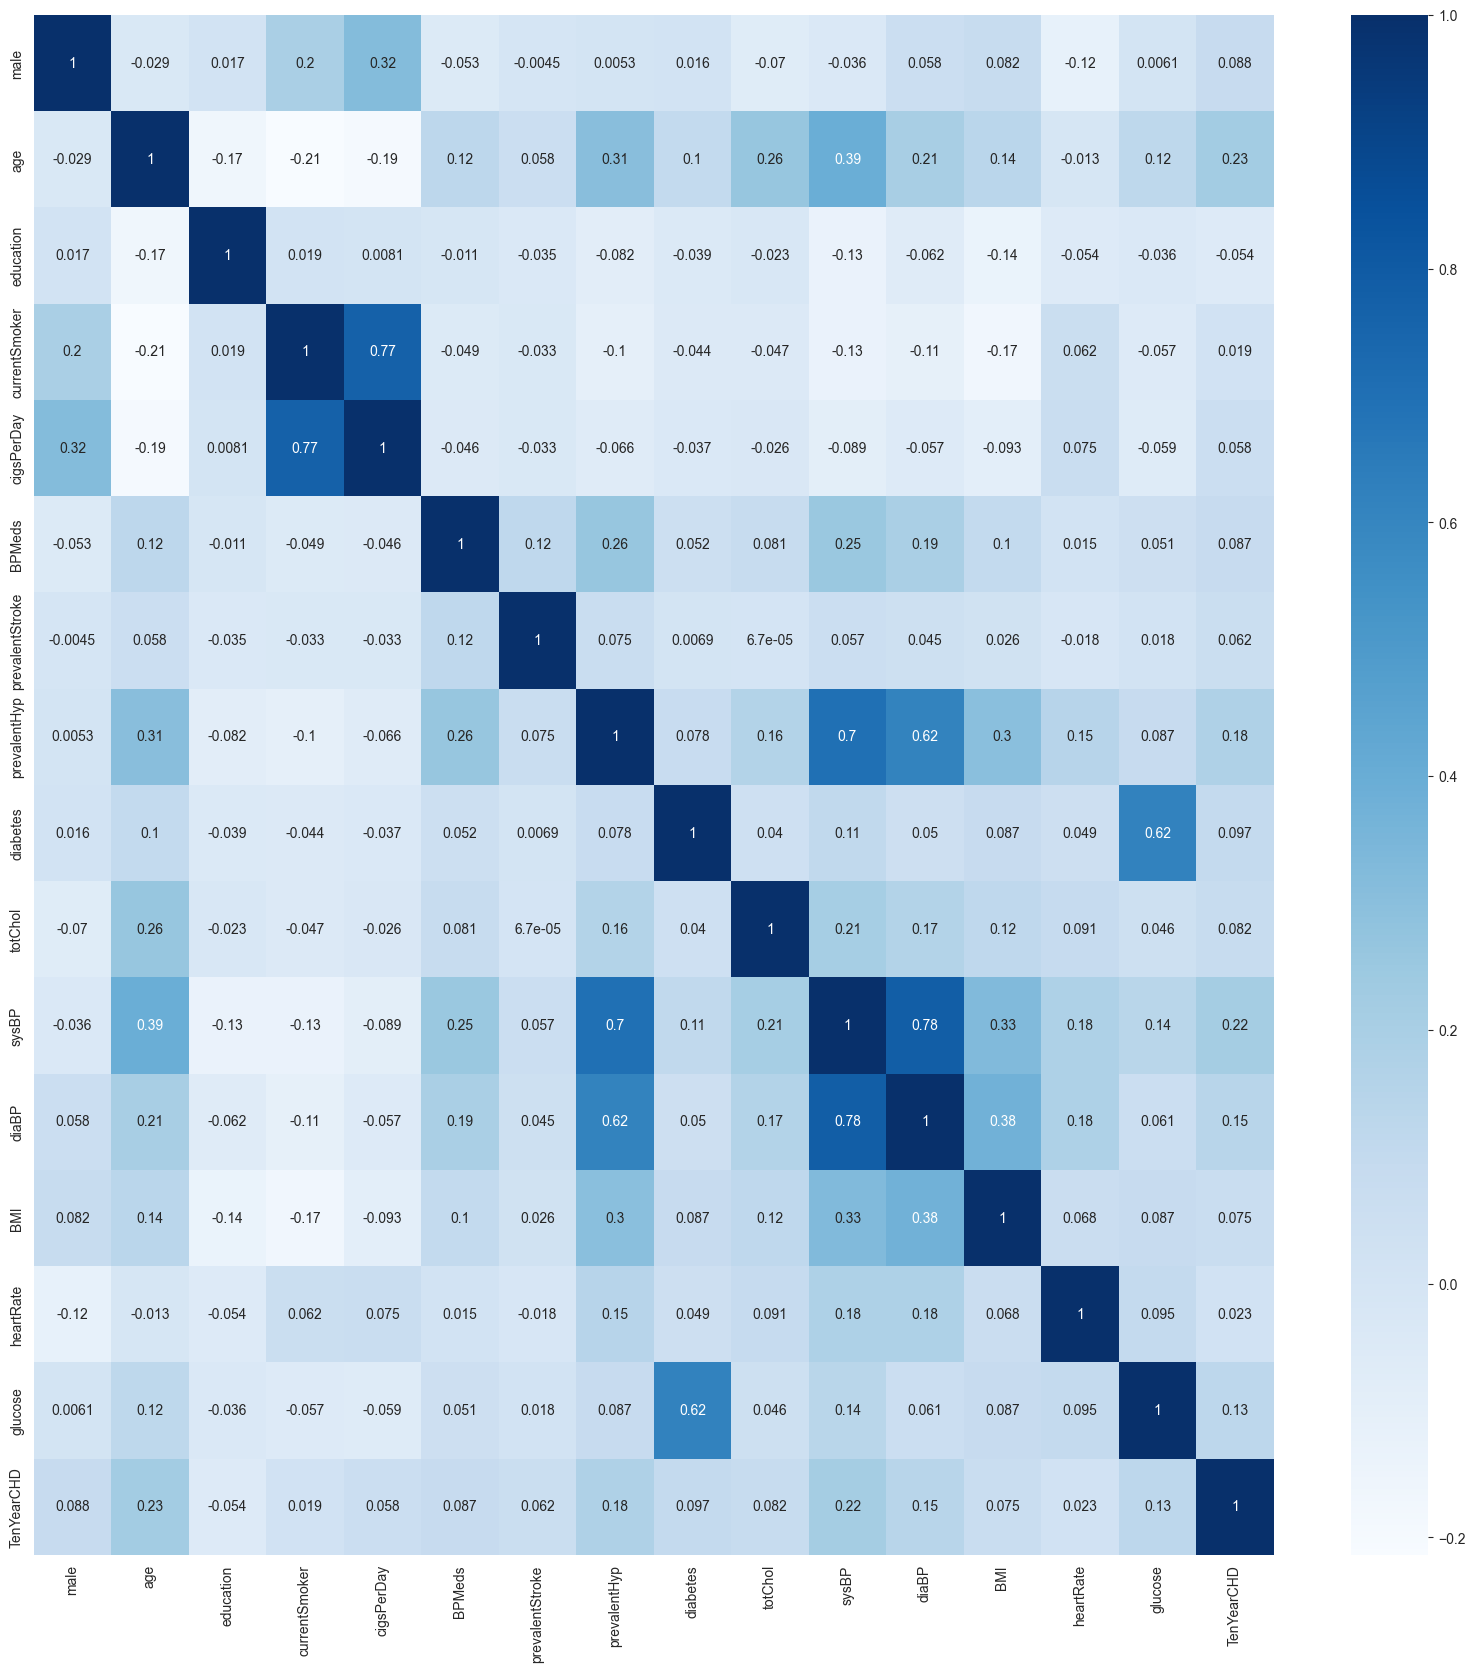

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.draw()

In [18]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

---

In [19]:
df = df.dropna()

In [20]:
X = df.loc[:, 'male': 'glucose']
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [21]:
y = df['TenYearCHD'].to_numpy()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

max: (0.12988854175418907, 12)
min: (0.0, 0)


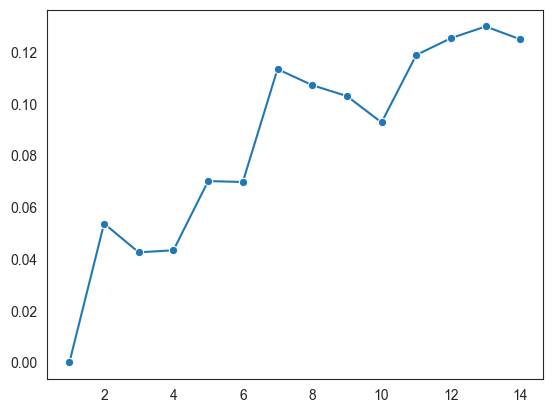

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = StandardScaler().fit_transform(X)

scores = np.empty(shape=(0,))

for k in range(1, X.shape[1]):
    
    fvalue_selector = SelectKBest(f_classif, k = k)
    k_best_features = fvalue_selector.fit_transform(X, y)

    from sklearn.model_selection import cross_val_score, KFold
    cv_scores = cross_val_score(
        estimator=LogisticRegression(),
        X=k_best_features,
        y=y,
        cv=KFold(n_splits=5, shuffle=True),
        n_jobs=-1,
        scoring='f1'
    )

    scores = np.concatenate([scores, [cv_scores.mean()]])

print(f'max: {scores.max(), scores.argmax()}')
print(f'min: {scores.min(), scores.argmin()}')

ax = sns.lineplot(x=range(1, scores.shape[0]+1), y=scores, marker='o')
plt.draw()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       618
           1       0.50      0.18      0.26       114

    accuracy                           0.84       732
   macro avg       0.68      0.57      0.59       732
weighted avg       0.81      0.84      0.81       732

AUD: 0.6941605632203486


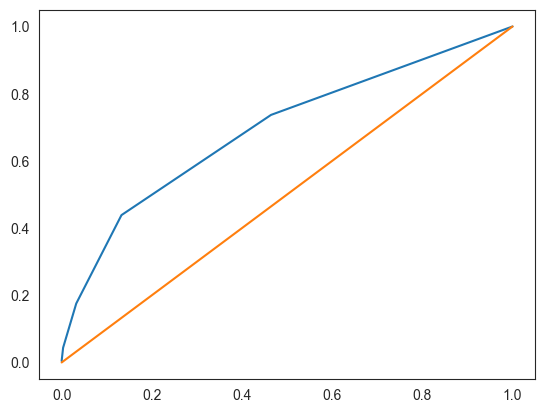

In [59]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

from sklearn.linear_model import LogisticRegression
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresh = roc_curve(
    y_test,
    y_probabilities
)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

print(f"AUD: {auc(fpr, tpr)}")

sns.lineplot(x=fpr, y=tpr)
sns.lineplot(x=[0,1], y=[0,1])
plt.draw()

In [260]:
from collections import Counter
Counter(np.array([1,2,3]))

Counter({1: 1, 2: 1, 3: 1})

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

knc = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors': [8, 9, 10, 11, 12],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

gs = GridSearchCV(
    estimator=knc,
    param_grid=hyperparameters,
    cv=5,
    verbose=True
)

gs.fit(X, y)

print(gs.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNeighborsClassifier(n_neighbors=10)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3099
           1       0.74      0.08      0.14       557

    accuracy                           0.86      3656
   macro avg       0.80      0.54      0.53      3656
weighted avg       0.84      0.86      0.80      3656

AUC: 0.837425983826369


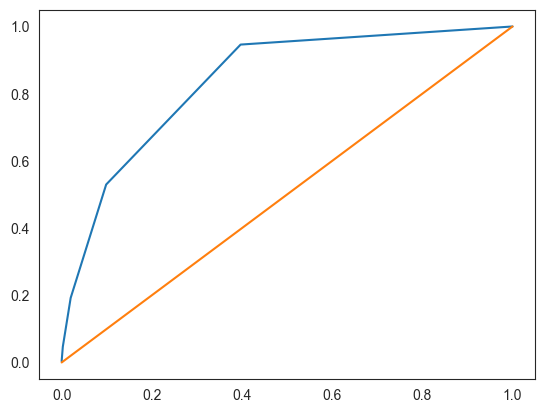

In [61]:
y_probabilities = model.predict_proba(X)[:, 1]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresh = roc_curve(
    y,
    y_probabilities
)

from sklearn.metrics import classification_report
print(classification_report(y, gs.predict(X)))

print(f"AUC: {auc(fpr, tpr)}")

sns.lineplot(x=fpr, y=tpr)
sns.lineplot(x=[0,1], y=[0,1])
plt.draw()

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

https://www.kaggle.com/code/nareshbhat/eda-classification-ensemble-92-accuracy